In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read dataset

df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.info

<bound method DataFrame.info of     Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160>

Text(0, 0.5, 'Height')

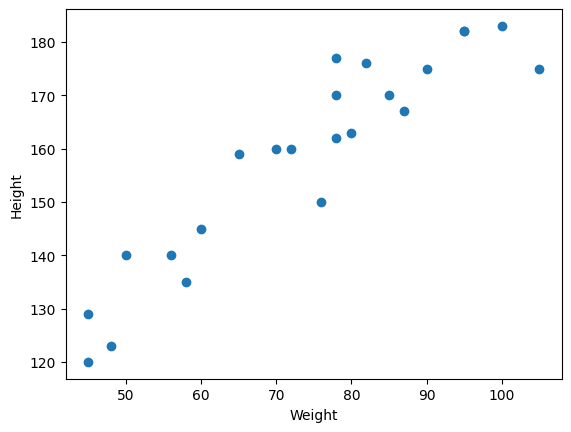

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
#divide data set in independent and dependent feature

In [17]:
X = df[['Weight']]#Independent feature
y  = df['Height']#dependent feature

In [18]:
#Train, test, split
from sklearn.model_selection import train_test_split


In [19]:
# X_train, X_test,: Independent feature for training data
#y_train, y_test : dependent feature for training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [20]:
X.shape

(23, 1)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [22]:
#Standardize the datset Train independent data
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit_transform(X_train)

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


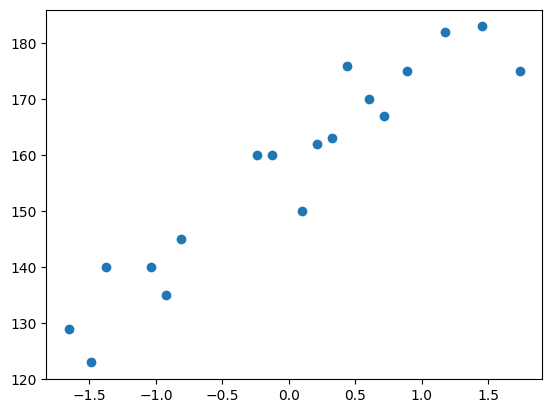

In [29]:
plt.scatter(X_train, y_train)

In [30]:
#Train the Simple Regression model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()

In [33]:
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
regressor.coef_

array([17.03440872])

In [36]:
print("The slope or coefficient of weight is ", regressor.coef_)
print("Intercept:", regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


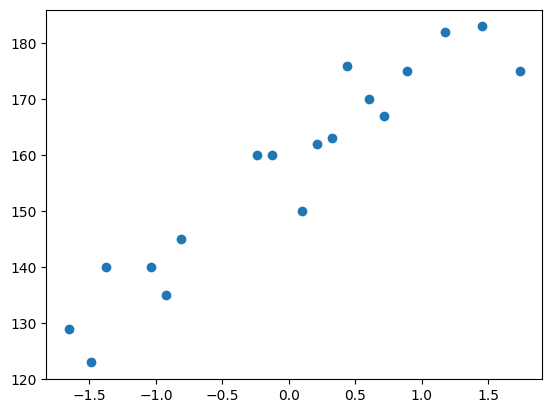

In [38]:
plt.scatter(X_train, y_train)


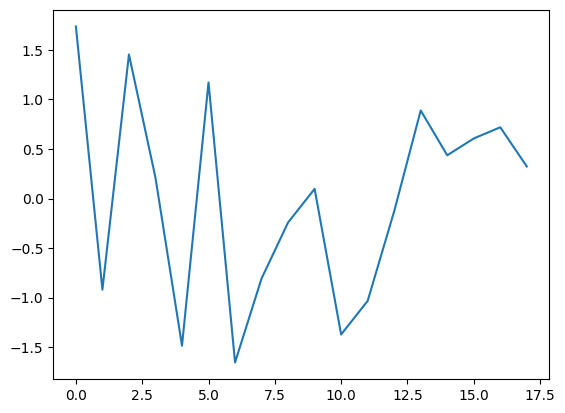

In [39]:
plt.plot(X_train)

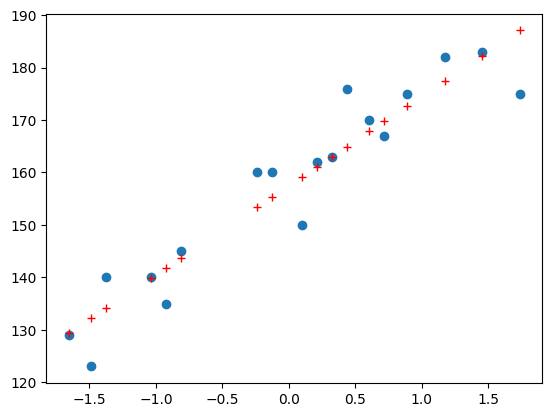

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r+')

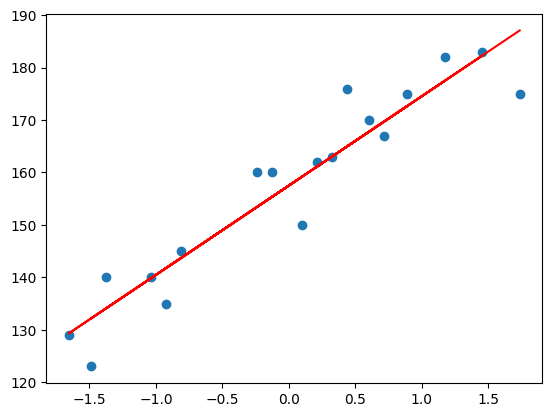

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r')

In [42]:
##  "### prediction of train data\n",
  ##              "1. predicted height output= intercept +coef_(Weights)\n",
    ######
    ##        "### prediction of test data\n",
      ##          "1. predicted height output= intercept +coef_(Weights)\n",
        ##        "2. y_pred_test =157.5 + 17.03(X_test)",

In [44]:
#prediction on train data
y_pred_test = regressor.predict(X_test)

In [45]:
y_pred_test,y_test

(array([1486.18388009, 1486.18388009,  924.04839236, 1775.76882831,
        1264.73656674]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

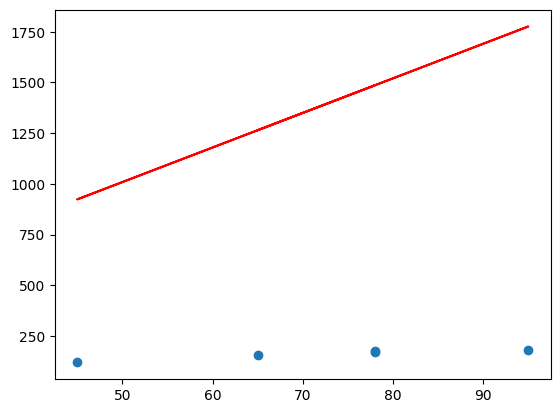

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test),'r')

In [48]:
#performance matrix
#MSE, MAE, RMSE
#R Square & adjusted R square

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1571109.7376966465
1225.7843095186977
1253.4391639392184


In [53]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [54]:
score

-3190.755521080462

In [55]:
#Adjusted R Square


#
 #               "**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**\n",
  #              "\n",
   #             "where:\n",
    #            "\n",
     #           "R2: The R2 of the model\n",
      #          "n: The number of observations\n",
       #         "k: The number of predictor variables",
1- (1- score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-4254.6740281072825

In [57]:
regressor

LinearRegression()

In [58]:
#new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

array([[80.]])

In [61]:
print(regressor.predict([scaled_weight[0]]))

[1520.25269753]


In [62]:
scaled_weight[0]

array([80.])

In [68]:
print("The height prediction for weight 80 ks is:" , regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 ks is: [1520.25269753]


In [69]:
#Assumption
#plot S scatter plot for prediction

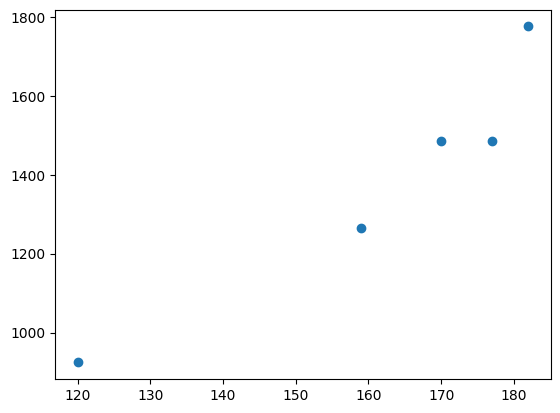

In [70]:
plt.scatter(y_test, y_pred_test)

In [4]:
# Residuals
residuals = y_test, y_pred_test
residuals

NameError: name 'y_test' is not defined

<ipython-input-76-5cc1e494a331>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


<Axes: ylabel='Density'>

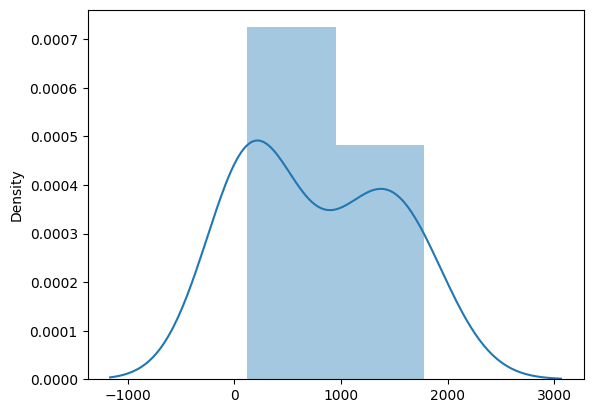

In [76]:
#plot  residuals

import seaborn as sns
sns.distplot(residuals, kde = True)

In [3]:
#Scatter plot with respect to prediction & residuals
# Uniform distribution
# plt.scatter(y_pred_test, residuals)
plt.scatter(y_pred_test,residuals)



NameError: name 'y_pred_test' is not defined